In [1]:
!pwd

/Users/felker/Downloads/Keith and Kyle


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['figure.dpi'] = 300

from IPython.display import Image

In [3]:
import seaborn as sns
print(sns.__version__)

0.11.2


### Bug in FacetGrid in Seaborn 0.11.1
https://github.com/mwaskom/seaborn/commit/dc10c4c55ae1e52beef2cb161b91b26ef280e14a

https://github.com/mwaskom/seaborn/issues/1560

Unrelated to actual issue, https://github.com/mwaskom/seaborn/issues/1653

In [4]:
# data = np.loadtxt('results.txt',skiprows=1)
data = pd.read_csv('results-bs1.txt')


In [5]:
data.columns

Index(['Num LSTM layers', 'Length of input sequences',
       'Hidden size of each LSTM layer', 'Total time 1k runs (s)',
       'Average time (s)'],
      dtype='object')

In [6]:
data['Average time (ms)'] = data['Average time (s)']*1000

In [7]:
# reverse order of legend
hue_order = data['Hidden size of each LSTM layer'].unique()

In [8]:
hue_order[::-1].sort()
# print(type(hue_order))
# print(hue_order.dtype)
# hue_order = np.array(map(str, hue_order))

#### KGF: I guess we dont need str keys for hue_order, style_order to match pandas "category" dtype?
# hue_order = hue_order.astype(str)
print(hue_order)

[400 300 256 200 128 100  64  32]


In [9]:
data['Hidden size of each LSTM layer'] = data['Hidden size of each LSTM layer'].astype('category')
print(data['Hidden size of each LSTM layer'])

0      100
1      128
2      200
3      256
4      300
      ... 
123    128
124    200
125    256
126     32
127     64
Name: Hidden size of each LSTM layer, Length: 128, dtype: category
Categories (8, int64): [32, 64, 100, 128, 200, 256, 300, 400]


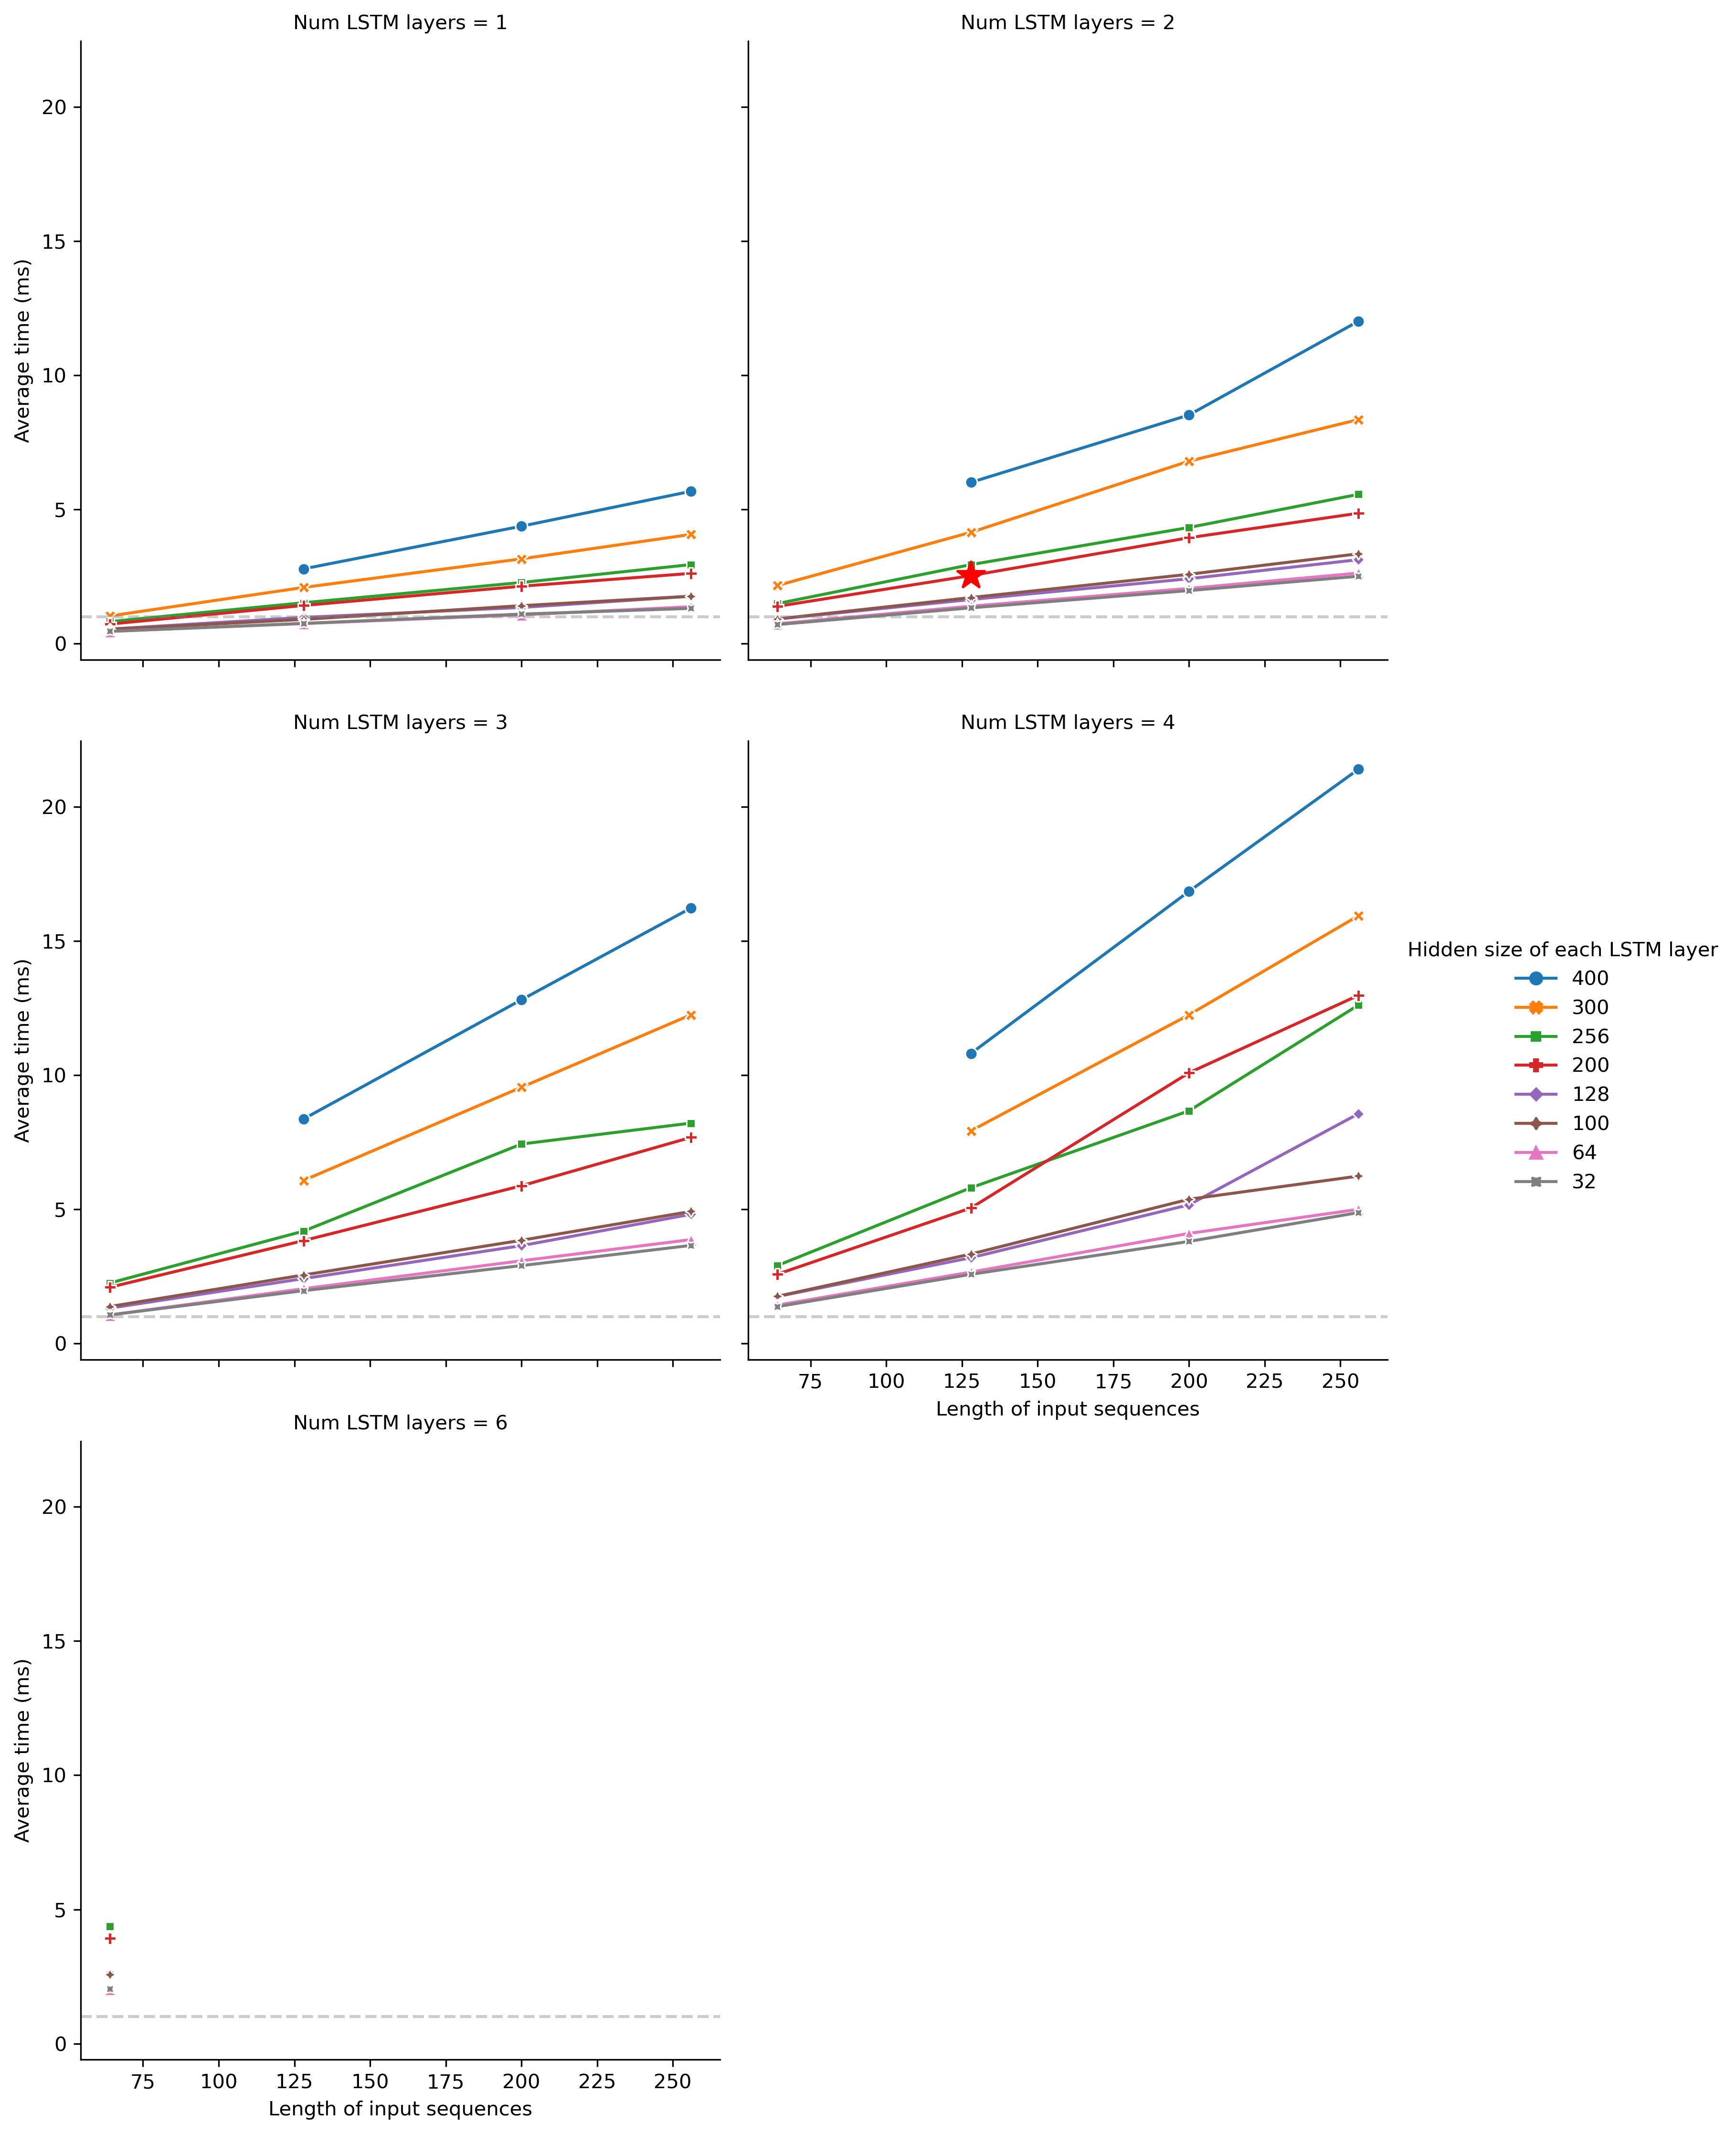

In [22]:
# fig, ax = plt.subplots()
# ax = sns.lineplot(data=data, x='Length of input sequences', y='Average time (ms)', style='Num LSTM layers', hue='Hidden size of each LSTM layer', ci=None)  # , marker='o', dashes=False);
# ax.set_ylabel('Average inference time (ms)')
# ax.set_title("A100 inference time for batch size=1")

g = sns.relplot(data=data, x='Length of input sequences', y='Average time (ms)', 
                 style='Hidden size of each LSTM layer', 
                 hue='Hidden size of each LSTM layer', 
                 col='Num LSTM layers', ci=None, kind='line', 
                 hue_order=hue_order, style_order=hue_order,
                  # https://github.com/mwaskom/seaborn/issues/1653
                 legend='full',
                 dashes=False,
                 col_wrap=2, markers=True) # marker=['o']) 

# reverse order of legend
#handles, labels = g.legend.legendHandles


# https://stackoverflow.com/questions/68591271/how-can-i-combine-hue-and-style-groups-in-a-seaborn-legend
# create a dictionary mapping the subscales to their color
# handles, labels = ax.get_legend_handles_labels()
# index_item_title = labels.index('Hidden size of each LSTM layer')
# color_dict = {label: handle.get_color()
#               for handle, label in zip(handles[1:index_item_title], labels[1:index_item_title])}

# # loop through the items, assign color via the subscale of the item idem
# for handle, label in zip(handles[index_item_title + 1:], labels[index_item_title + 1:]):
#     handle.set_color(color_dict[subscale_dict[ label]])

# # create a legend only using the items
# ax.legend(handles[index_item_title + 1:], labels[index_item_title + 1:], title='Item',
#           bbox_to_anchor=(1.03, 1.02), fontsize=10)

g.axes[1].plot([128], [0.00253291*1000], marker='*', markersize=15, markeredgecolor="red",
               markerfacecolor="red")
for ax in g.axes:
    ax.axhline(y=1, linestyle='--', color='gray', alpha=0.4 )


In [11]:
g.legend.legendHandles

In [12]:
g.figure.savefig("a100-batch-size-1.pdf")

In [13]:
data['Hidden size of each LSTM layer'].unique()

[100, 128, 200, 256, 300, 32, 400, 64]
Categories (8, int64): [100, 128, 200, 256, 300, 32, 400, 64]

In [14]:
data[data['Num LSTM layers'] == 6]

,Num LSTM layers,Length of input sequences,Hidden size of each LSTM layer,Total time 1k runs (s),Average time (s),Average time (ms)
122,6,64,100,2.57176,0.002572,2.57176
123,6,64,128,2.60619,0.002606,2.60619
124,6,64,200,3.92055,0.003921,3.92055
125,6,64,256,4.36278,0.004363,4.36278
126,6,64,32,2.03603,0.002036,2.03603
127,6,64,64,2.02060,0.002021,2.02060


In [15]:
data[data['Num LSTM layers'] == 4].drop(
    # labels=[0], axis=1)
    columns=data.columns[[0, -2, -3]]).sort_values(by=['Hidden size of each LSTM layer', 'Length of input sequences'])

,Length of input sequences,Hidden size of each LSTM layer,Average time (ms)
120,64,32,1.37694
97,128,32,2.58057
105,200,32,3.80626
113,256,32,4.88104
121,64,64,1.43283
99,128,64,2.66454
107,200,64,4.10445
115,256,64,5.00359
116,64,100,1.75943
92,128,100,3.33718
